In [4]:
import pandas as pd
import numpy as np
import pybaseball as pb
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# let's start with Logan Webb
webb = pb.statcast_pitcher('2023-03-30', '2023-10-01', 657277)

In [6]:
webb.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [7]:
webb['description'].unique()

array(['hit_into_play', 'foul', 'called_strike', 'ball',
       'swinging_strike', 'foul_tip', 'swinging_strike_blocked',
       'blocked_ball', 'hit_by_pitch', 'foul_bunt'], dtype=object)

In [8]:
cond = (webb['on_1b'].notna() & webb['outs_when_up'].isin([0, 1]))
webb['dp_scenario'] = np.where(cond, 1, 0)

In [9]:
webb.groupby('dp_scenario')['pitch_type'].count()

dp_scenario
0    1652
1     289
Name: pitch_type, dtype: int64

In [10]:
webb = webb.join(pd.get_dummies(webb['pitch_type'], prefix='is'))

The changeup is Webb's signature groundball pitch

In [11]:
webb.groupby('pitch_type')['launch_angle'].mean().round()

pitch_type
CH    -9.0
FF    27.0
SI     7.0
SL    22.0
Name: launch_angle, dtype: float64

He leans on it more in double play scenarios

In [12]:
webb.groupby('dp_scenario')[['is_FF', 'is_SI', 'is_CH', 'is_SL']].mean().round(2)

,is_FF,is_SI,is_CH,is_SL
dp_scenario,,,,
0,0.04,0.38,0.36,0.22
1,0.03,0.39,0.43,0.16


He tends to get more ground balls in double play scenarios

In [13]:
webb.groupby('dp_scenario')['launch_angle'].mean().round()

dp_scenario
0    4.0
1   -1.0
Name: launch_angle, dtype: float64

In [14]:
webb['events'].unique()

array(['field_out', None, 'home_run', 'strikeout', 'double', 'single',
       'grounded_into_double_play', 'force_out', 'walk', 'field_error',
       'hit_by_pitch', 'fielders_choice_out', 'sac_bunt',
       'catcher_interf', 'triple', 'double_play'], dtype=object)

In [15]:
webb = webb.join(pd.get_dummies(webb['events'], prefix='is'))

In [16]:
webb['is_GB'] = np.where(webb['launch_angle'] < 0, 1, 0)

In [17]:
P_GB = webb.dropna(subset=['launch_angle']).groupby('dp_scenario')['is_GB'].mean().round(2)

In [18]:
P_GB

dp_scenario
0    0.46
1    0.54
Name: is_GB, dtype: float64

In [19]:
webb['des'].str.contains('ground').mean()

0.3487892838742916

In [20]:
bbe = webb.dropna(subset=['launch_angle'])

In [21]:
df = pb.pitching_stats(2023, qual=100)

In [22]:
df.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'LA', 'Barrels', 'Barrel%', 'maxEV', 'HardHit', 'HardHit%', 'Events',
       'CStr%', 'CSW%', 'xERA'],
      dtype='object', length=334)

In [23]:
df['GB%'].median()

0.425

Let's define a ground ball pitcher as any pitcher who has > 45% GB rate

In [24]:
df['gb_pitcher'] = np.where(df['GB%'] > 0.45, 1, 0)

In [25]:
df.groupby('gb_pitcher')['ERA', 'xERA'].mean().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_7584\2546960489.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gb_pitcher')['ERA', 'xERA'].mean().round(2)


,ERA,xERA
gb_pitcher,,
0,3.93,4.11
1,3.67,4.13


In [26]:
pd.qcut(df['GB%'], 5)

7     (0.412, 0.448]
10    (0.377, 0.412]
30    (0.377, 0.412]
3     (0.478, 0.605]
22     (0.27, 0.377]
1     (0.478, 0.605]
11    (0.478, 0.605]
8     (0.478, 0.605]
5     (0.478, 0.605]
19    (0.478, 0.605]
4      (0.27, 0.377]
14    (0.412, 0.448]
34    (0.377, 0.412]
21    (0.377, 0.412]
9     (0.448, 0.478]
16    (0.448, 0.478]
23    (0.448, 0.478]
25     (0.27, 0.377]
2     (0.412, 0.448]
35    (0.412, 0.448]
32    (0.377, 0.412]
33    (0.377, 0.412]
12    (0.478, 0.605]
15    (0.448, 0.478]
17    (0.448, 0.478]
42    (0.448, 0.478]
6     (0.377, 0.412]
39    (0.478, 0.605]
0     (0.412, 0.448]
24    (0.377, 0.412]
26    (0.448, 0.478]
29    (0.478, 0.605]
13    (0.478, 0.605]
27     (0.27, 0.377]
37    (0.448, 0.478]
31    (0.412, 0.448]
41     (0.27, 0.377]
20    (0.412, 0.448]
43    (0.412, 0.448]
36     (0.27, 0.377]
44    (0.448, 0.478]
18     (0.27, 0.377]
46    (0.377, 0.412]
40    (0.377, 0.412]
38     (0.27, 0.377]
28     (0.27, 0.377]
45     (0.27, 0.377]
Name: GB%, dt

In [27]:
df.groupby(pd.qcut(df['GB%'], 2))['ERA', 'xERA'].mean().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_7584\3225055052.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(pd.qcut(df['GB%'], 2))['ERA', 'xERA'].mean().round(2)


,ERA,xERA
GB%,,
"(0.27, 0.425]",4.07,4.08
"(0.425, 0.605]",3.59,4.15


Let's look at the exit velocity and launch angle of double plays in 2023

In [28]:

bbe_2015 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2016 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2017 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")
bbe_2018 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2019 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2020 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")
bbe_2021 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2022 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2023 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")

bbe = pd.concat([bbe_2015, bbe_2016, bbe_2017, bbe_2018, bbe_2019, bbe_2020, bbe_2021, bbe_2022, bbe_2023])

<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

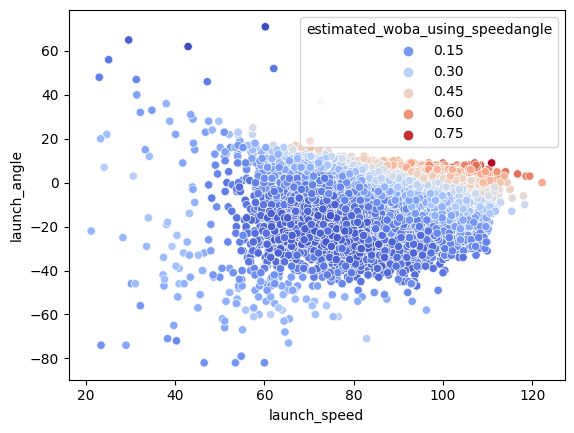

In [29]:
gidp = bbe.loc[bbe['events'] == 'grounded_into_double_play']
sns.scatterplot(data=gidp, x='launch_speed', y='launch_angle', hue='estimated_woba_using_speedangle', palette='coolwarm')

<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

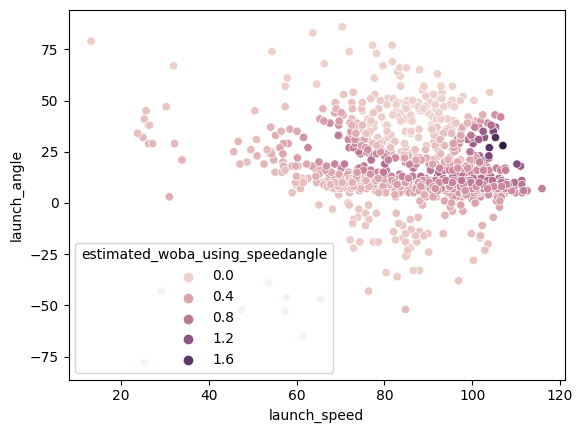

In [30]:
other_dp = bbe.loc[bbe['events'] == 'double_play']
sns.scatterplot(data=other_dp, x='launch_speed', y='launch_angle', hue='estimated_woba_using_speedangle')

In [31]:
gidp[['launch_speed', 'launch_angle']].describe()

,launch_speed,launch_angle
count,25785.000000,25785.000000
mean,88.324968,-9.247818
std,13.524604,12.500268
min,21.200000,-82.000000
25%,79.400000,-17.000000
50%,90.500000,-8.000000
75%,98.900000,0.000000
max,122.200000,71.000000


In [32]:
gidp.loc[gidp['launch_angle'] > 10, ['launch_angle', 'launch_speed', 'description', 'des']].head()

,launch_angle,launch_speed,description,des
1017,15.0,58.5,hit_into_play,"Dodgers challenged (play at 1st), call on the ..."
2135,65.0,29.6,hit_into_play,Eduardo Rodriguez ground bunts into a double p...
3270,11.0,62.6,hit_into_play,"Harrison Bader grounds into a double play, sho..."
6051,13.0,72.0,hit_into_play,"Ben Gamel grounds into a double play, shortsto..."
7499,18.0,57.8,hit_into_play,"Manny Pina grounds into a double play, second ..."


In [33]:
bbe['is_gb'] = np.where(bbe['des'].str.contains('ground'), 1, 0)

<AxesSubplot: >

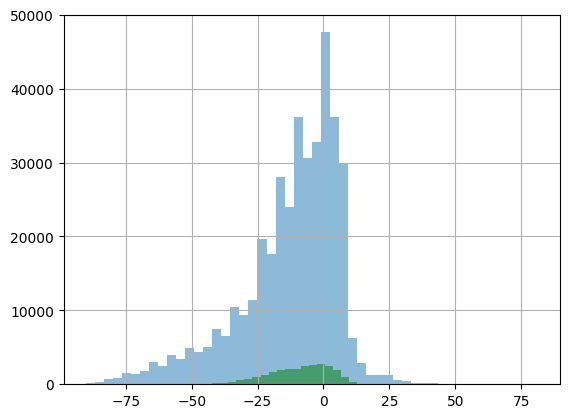

In [34]:
bbe.loc[bbe['is_gb']==1, 'launch_angle'].hist(bins=50, alpha=0.5)
bbe.loc[bbe['events']=='grounded_into_double_play', 'launch_angle'].hist(bins=50, alpha=0.5, color='green')

In [35]:
print(bbe.loc[bbe['is_gb']==1, ['launch_speed', 'launch_angle', 'des']])

       launch_speed  launch_angle  \
0              95.2         -13.0   
1              93.3         -18.0   
5              76.1         -25.0   
6              99.7         -18.0   
9              79.2         -41.0   
...             ...           ...   
72714          95.6          -8.0   
72717          81.0         -32.0   
72718          73.5          -4.0   
72721          75.7           4.0   
72723          61.4          -9.0   

                                                     des  
0      Francisco Lindor grounds out, third baseman Eh...  
1      Brandon Nimmo grounds out, second baseman Ozzi...  
5      Jonathan Villar grounds out to first baseman A...  
6      Orlando Arcia grounds out, second baseman Jose...  
9      Dominic Smith grounds out, second baseman Ozzi...  
...                                                  ...  
72714  Mike Moustakas singles on a ground ball to cen...  
72717  Luis Rengifo grounds out, second baseman Mauri...  
72718  Mickey Moniak sin

In [42]:
bbe['is_gidp'] = np.where(bbe['events'] == 'grounded_into_double_play', 1, 0)
bbe['is_gidp'] = pd.to_numeric(bbe['is_gidp'], errors='coerce')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, auc

# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.1, 0.5, 1],
#     'class_weight': [None, 'balanced'],
#     'solver': ['liblinear']
# }

# clf = LogisticRegression(random_state=0)

clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [50, 100, 500, 1000, 2000],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=3, n_jobs=-1)

In [45]:
X = bbe[['launch_speed', 'launch_angle']]
y = bbe['is_gidp']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [50, 100, 500, 1000, 2000]},
             scoring='roc_auc', verbose=2)

In [48]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_neighbors': 50}


In [49]:
best_model = grid_search.best_estimator_
# y_pred_proba = best_model.predict_proba(X_test)

In [69]:
high_k = KNeighborsClassifier(n_neighbors=2500, weights='distance')
high_k.fit(X_train, y_train)
y_pred_proba = high_k.predict_proba(X_test)

In [70]:
y_pred_proba = y_pred_proba[:, 1]  # Use the second column as the predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", roc_auc)

ROC AUC score: 0.8404516506837575


In [71]:
fpr, tpr, thhrerholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

Text(0, 0.5, 'True Positive Rate')

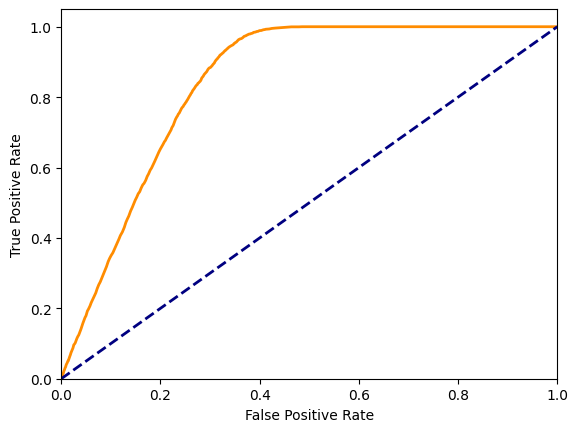

In [72]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

(array([9.9931e+04, 3.4050e+03, 3.2180e+03, 2.4330e+03, 2.1040e+03,
        1.9810e+03, 1.4550e+03, 1.2930e+03, 1.4490e+03, 1.2160e+03,
        1.2660e+03, 1.7600e+03, 1.5630e+03, 1.4340e+03, 1.0140e+03,
        1.0980e+03, 1.2960e+03, 1.2990e+03, 1.5180e+03, 1.6220e+03,
        1.8330e+03, 1.7040e+03, 2.0930e+03, 1.6840e+03, 1.8460e+03,
        2.9670e+03, 2.5570e+03, 3.7900e+03, 3.5150e+03, 3.5860e+03,
        4.4240e+03, 3.9430e+03, 3.7740e+03, 4.4630e+03, 3.5150e+03,
        2.7180e+03, 2.7060e+03, 1.7300e+03, 1.4050e+03, 6.8800e+02,
        4.8500e+02, 5.7600e+02, 2.7500e+02, 1.8900e+02, 1.2700e+02,
        8.8000e+01, 8.1000e+01, 5.3000e+01, 1.2000e+01, 9.0000e+00]),
 array([0.      , 0.002544, 0.005088, 0.007632, 0.010176, 0.01272 ,
        0.015264, 0.017808, 0.020352, 0.022896, 0.02544 , 0.027984,
        0.030528, 0.033072, 0.035616, 0.03816 , 0.040704, 0.043248,
        0.045792, 0.048336, 0.05088 , 0.053424, 0.055968, 0.058512,
        0.061056, 0.0636  , 0.066144, 0.068688

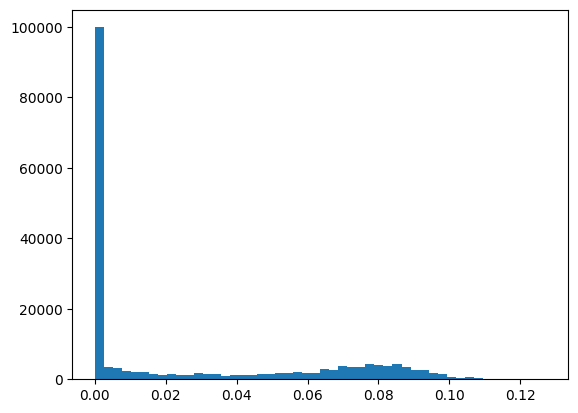

In [73]:
plt.hist(y_pred_proba, bins=50)

In [75]:
ev_space = np.linspace(0, 120, 121)
la_space = np.linspace(-45, 45, 91)
ev_grid, la_grid = np.meshgrid(ev_space, la_space)
X_grid = np.column_stack((ev_grid.ravel(), la_grid.ravel()))

In [76]:
pred_grid = high_k.predict_proba(X_grid)[:,1]
y_proba_grid = pred_grid.reshape(ev_grid.shape)

c:\Users\wampl\anaconda3\envs\datasci\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


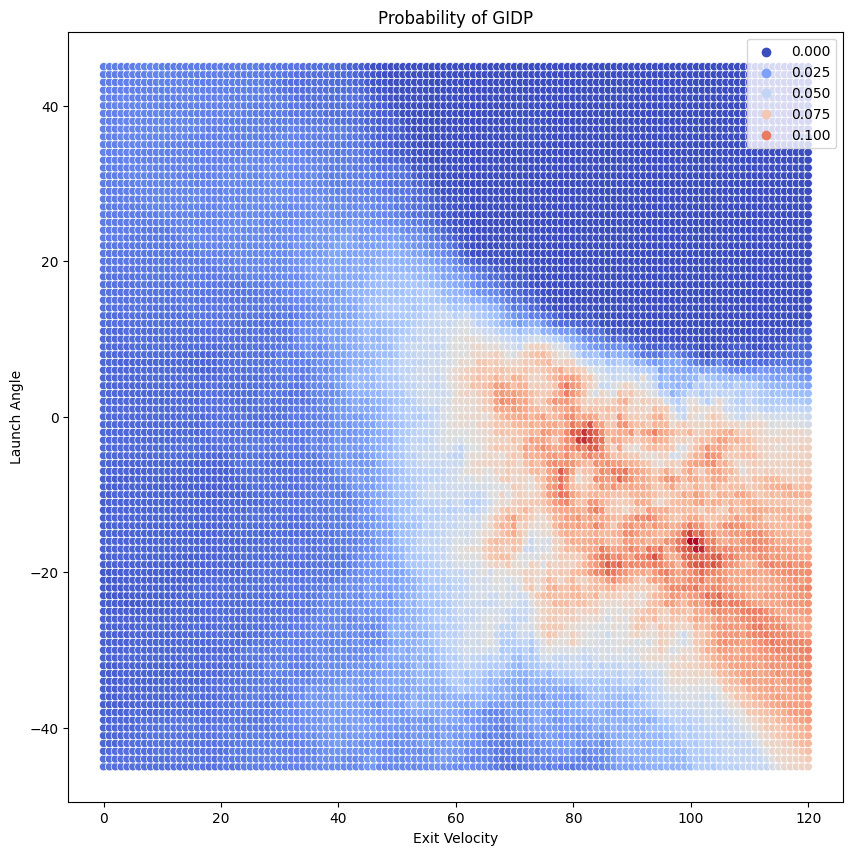

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=ev_grid.ravel(), y=la_grid.ravel(), hue=pred_grid, palette='coolwarm', legend=True)
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
plt.title('Probability of GIDP')
plt.show()

In [78]:
import joblib

In [79]:
joblib.dump(high_k, 'C:/Users/wampl/sxwOBA/models/gidp_prob_model.joblib')

['C:/Users/wampl/sxwOBA/models/gidp_prob_model.joblib']